# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.125034e+01     6.077963e+00
 * time: 0.004147052764892578
     1     2.732841e+01     5.086402e+00
 * time: 0.012143135070800781
     2     2.667759e+01     9.052638e+00
 * time: 0.08771109580993652
     3     1.361511e+01     1.855983e+00
 * time: 0.1104271411895752
     4     1.347384e+01     2.435767e+00
 * time: 0.1256411075592041
     5     1.268238e+01     1.754229e+00
 * time: 0.14049911499023438
     6     1.152985e+01     1.219802e+00
 * time: 0.15511202812194824
     7     1.098926e+01     1.916448e+00
 * time: 0.16973209381103516
     8     1.062008e+01     1.354462e+00
 * time: 0.18437600135803223
     9     1.030364e+01     1.574353e+00
 * time: 0.1989901065826416
    10     9.962723e+00     9.361419e-01
 * time: 0.2137441635131836
    11     9.761449e+00     5.607710e-01
 * time: 0.22845005989074707
    12     9.576949e+00     5.076639e-01
 * time: 0.24312901496887207
    13     9.505581e+00     6.471381e-01
 * time: 0

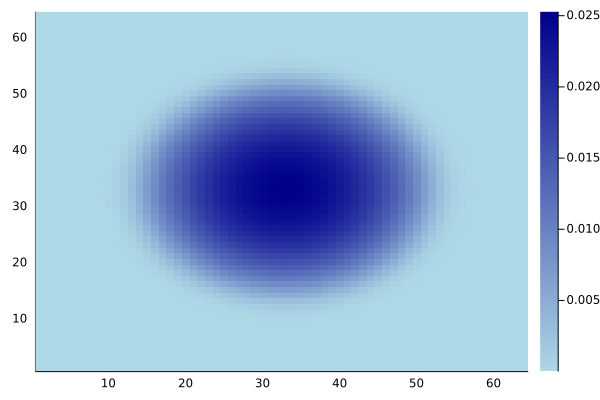

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)